In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Text(0, 0.5, 'Haha')

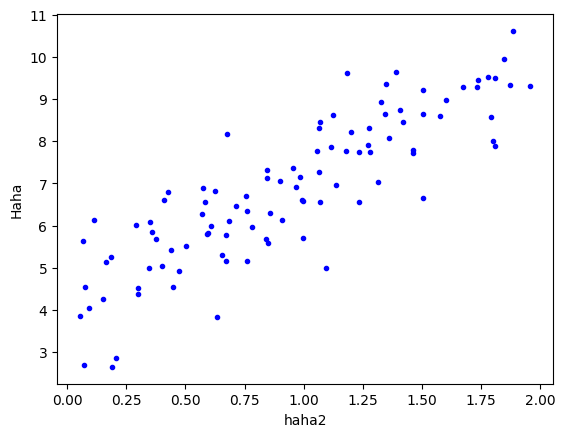

In [2]:
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.xlabel("haha2")
plt.ylabel("Haha")

In [3]:
X_b = np.c_[np.ones((100,1)), X] # just to increase the nuumber of features for demo purposes ig
thetha_best = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) ## you can also use pinv... why??


In [4]:
thetha_best ## LEARN SVD and EigenValues and MOORE Penrose Inverse later on

array([[4.16256879],
       [2.88422668]])

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1 )), X_new]

y_predict = np.dot(X_new_b, thetha_best)

In [6]:
y_predict

array([[4.16256879],
       [9.93102214]])

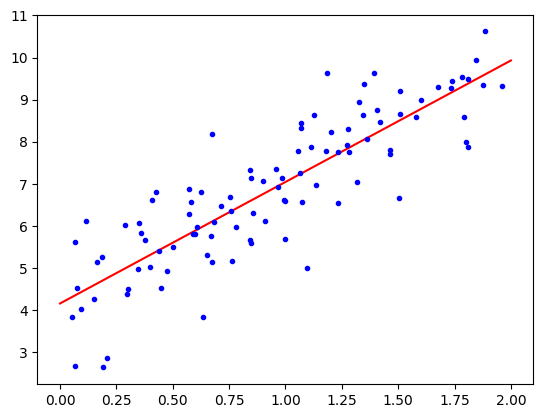

In [7]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.xlabel = "X"
plt.ylabel = "Y"

plt.show()

In [8]:
## using scikit learn

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
lin_reg.intercept_

array([4.16256879])

In [10]:
lin_reg.coef_

array([[2.88422668]])

 Now we will look at very different ways to train a Linear Regression model, better
 suited for cases where there are a large number of features, or too many training
 instances to fit in memory.

Suppose you are lost in the mountains in a dense fog; you can only feel the slope of
 the ground below your feet. A good strategy to get to the bottom of the valley quickly
 is to go downhill in the direction of the steepest slope. This is exactly what Gradient
 Descent does

## Gradient Descent

### important

 When using Gradient Descent, you should ensure that all features
 have a similar scale (e.g., using Scikit-Learn’s StandardScaler
 class), or else it will take much longer to converge.

In [11]:


# np.random.rand gives only between 0 and 1
# np.random.randint gives only integers
# np.random.randn gives maybe float values with no restriction??
thetha = np.random.randn(2,1) # random intialisation

In [12]:
eta = 0.1 # learning rate
n_iterations = 1000000 # also called, epochs
m = 100 # number of data points (X)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(thetha) - y)

    thetha = thetha - eta * gradients

To find a good learning rate, you can use Grid Search

## Stochiastic (Random) Gradient Descent

Therefore randomness is good to escape from local optima, but bad because it means
 that the algorithm can never settle at the minimum. One solution to this dilemma is
 to gradually reduce the learning rate. The steps start out large (which helps make
 quick progress and escape local minima), then get smaller and smaller, allowing the
 algorithm to settle at the global minimum. This process is called simulated annealing,
 because it resembles the process of annealing in metallurgy where molten metal is
 slowly cooled down. The function that determines the learning rate at each iteration
 is called the learning schedule. If the learning rate is reduced too quickly, you may get
 stuck in a local minimum, or even end up frozen halfway to the minimum. If the
 learning rate is reduced too slowly, you may jump around the minimum for a long
 time and end up with a suboptimal solution if you halt training too early.

# implementing SGD

In [13]:
n_epochs = 50
t0, t1 = 5, 50 #learning schedule hyperparameters

def learning_schedule(t):
    return t0/ (t+t1)


In [14]:
thetha = np.random.rand(2,1) # random initialisation
# m is number of data points
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(thetha) - yi)
        eta = learning_schedule(epoch * m + i )
        print(eta)
        thetha = thetha - eta * gradients
    

0.1
0.09803921568627451
0.09615384615384616
0.09433962264150944
0.09259259259259259
0.09090909090909091
0.08928571428571429
0.08771929824561403
0.08620689655172414
0.0847457627118644
0.08333333333333333
0.08196721311475409
0.08064516129032258
0.07936507936507936
0.078125
0.07692307692307693
0.07575757575757576
0.07462686567164178
0.07352941176470588
0.07246376811594203
0.07142857142857142
0.07042253521126761
0.06944444444444445
0.0684931506849315
0.06756756756756757
0.06666666666666667
0.06578947368421052
0.06493506493506493
0.0641025641025641
0.06329113924050633
0.0625
0.06172839506172839
0.06097560975609756
0.060240963855421686
0.05952380952380952
0.058823529411764705
0.05813953488372093
0.05747126436781609
0.056818181818181816
0.056179775280898875
0.05555555555555555
0.054945054945054944
0.05434782608695652
0.053763440860215055
0.05319148936170213
0.05263157894736842
0.052083333333333336
0.05154639175257732
0.05102040816326531
0.050505050505050504
0.05
0.04950495049504951
0.04901960

In [15]:
thetha

array([[4.16864259],
       [2.90162127]])

In [16]:
# Attempting SGD using  Scikit learn

from sklearn.linear_model import SGDRegressor

sgd_reg= SGDRegressor(penalty=None, eta0=0.1)

sgd_reg.fit(X, y.ravel()) # automatically sets for bias



,loss,'squared_error'
,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [17]:
sgd_reg.intercept_

array([4.12251434])

In [18]:
sgd_reg.coef_

array([2.88301866])


## Polynomial Regression

 Surprisingly,
 you can actually use a linear model to fit nonlinear data. A simple way to do this is to
 add powers of each feature as new features, then train a linear model on this extended
 set of features. This technique is called Polynomial Regression

TypeError: 'str' object is not callable

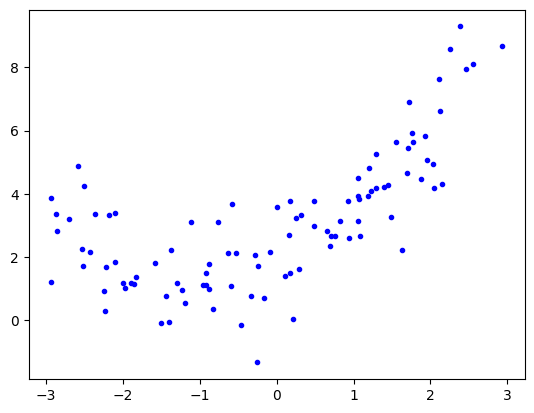

In [19]:
# First, let’s generate some nonlinear data, based on a simple quadratic equation

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1 ) # plotting a quadratic equation

plt.plot(X, y, "b.")
plt.xlabel("x1")
plt.ylabel("y")
plt.grid()

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)


In [22]:
X.shape # 100 rows

(100, 1)

In [23]:
print(X[0])
print(X_poly[0]) #  X_poly now contains the original feature of X plus the square of this feature


[1.2965691]
[1.2965691  1.68109142]


In [24]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)


y_predicted = lin_reg.predict(X_poly)

[1.85850333] [[1.05239911 0.51233175]]


TypeError: 'str' object is not callable

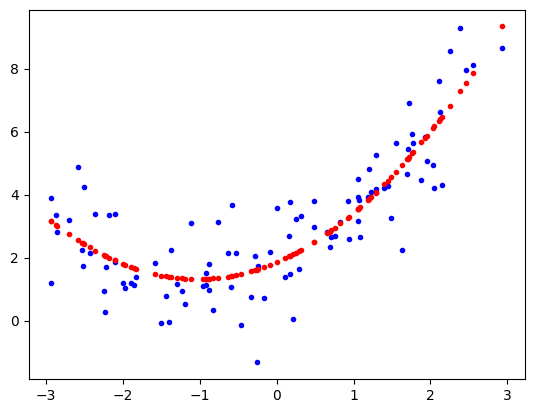

In [25]:
plt.plot(X, y, "b.")
plt.plot(X, y_predicted, "r.")
plt.xlabel("x1")
plt.ylabel("y")
plt.grid()


In [26]:
# what if we do three degree??

three_deg_poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly_three_deg = three_deg_poly_features.fit_transform(X)


In [27]:
three_deg_lin_reg = LinearRegression()
three_deg_lin_reg.fit(X_poly_three_deg, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
y_pred_three_deg = three_deg_lin_reg.predict(X_poly_three_deg)


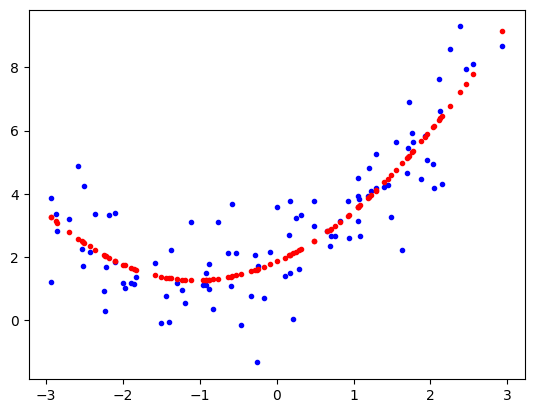

In [29]:
plt.plot(X, y, "b.")
plt.plot(X, y_pred_three_deg, "r.")


In [30]:
from sklearn.metrics import mean_squared_error
mse_two_deg = mean_squared_error(y, y_predicted)
mse_three_deg = mean_squared_error(y, y_pred_three_deg)

In [31]:
print("two deg error ", mse_two_deg)
print("three deg error ", mse_three_deg)
LinearRegression

two deg error  1.1582043220768932
three deg error  1.1565375295123934


sklearn.linear_model._base.LinearRegression

In [32]:
# deciding on complexity of the model

from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X: np.array, y: np.array, title: str): # training set = validation set
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        
        train_errors.append(rmse(y_train[:m], y_train_predict))
        val_errors.append(rmse(y_val, y_val_predict))
        
        
    plt.plot(train_errors, "r-+", linewidth=2, label="train")
    plt.plot(val_errors, "b-", linewidth=3, label="val")
    plt.ylabel = "RMSE"
    plt.xlabel = "Training Set size"
    plt.title(title)
    
        
        

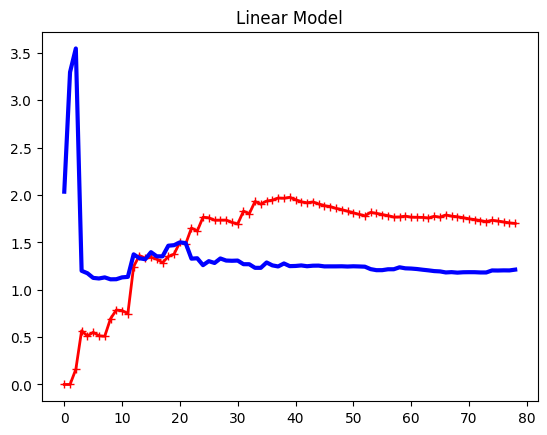

In [36]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y, "Linear Model")


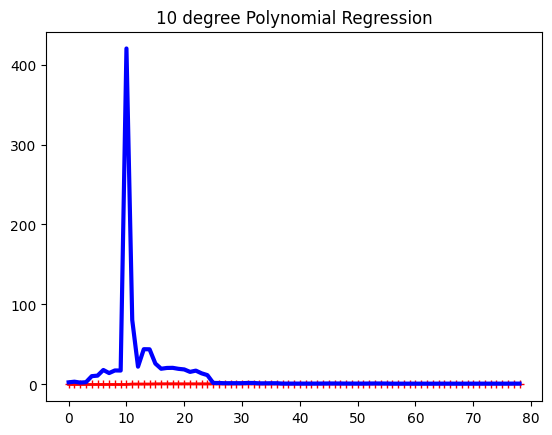

In [37]:
# Now let’s look at the learning curves of a 10th-degree polynomial model on the same data

from sklearn.pipeline import Pipeline

poly_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(poly_regression, X, y, "10 degree Polynomial Regression")

## One way to improve an overfitting model is to feed it more training
## data until the validation error reaches the training error

# Regularisation

### Ridge Regression

 adding a penalty term... means minimising the loss function and the values of weights also

#### in linear regression, you can perform Ridge regularisaation using
1. closed form soln (like normal equation of linear regression)
2. Gradient Descent

In [38]:
# Closed form Solution Ridge Regression

from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([4.44213355])

In [39]:
# using Stochastic Gradient descent

sgd_reg_with_ridge = SGDRegressor(penalty="l2", max_iter=5000, eta0=0.01) # l2 means square of weights is added (ridge).. l1 means absolutbe weights are added (lasso)
sgd_reg_with_ridge.fit(X, y.ravel())

sgd_reg.predict([[1.5]])


array([8.44704233])

In [40]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

sgd_reg = make_pipeline(
    StandardScaler(),  # Feature scaling is crucial
    SGDRegressor(
        penalty="l2",     # Ridge
        alpha=1.0,        # Match alpha with Ridge
        max_iter=5000,    # More iterations
        tol=1e-5,         # Allow tighter convergence
        # learning_rate='constant',
        eta0=0.01,        # Learning rate
        random_state=42
    )
)

sgd_reg.fit(X, y.ravel())
print(sgd_reg.predict([[1.5]]))


[3.70799179]


####  Lasso Regression automatically performs feature selection and outputs a sparse model (i.e., with few nonzero feature weights).

In [41]:
from sklearn.linear_model import Lasso
lasso_reg  = Lasso(alpha=0.1)
lasso_reg.fit(X, y)

lasso_reg.predict([[1.5]])

array([4.385411])

 So when should you use plain Linear Regression (i.e., without any regularization),
 Ridge, Lasso, or Elastic Net? It is almost always preferable to have at least a little bit of
 regularization, so generally you should avoid plain Linear Regression. Ridge is a good
 default, but if you suspect that only a few features are actually useful, you should pre
fer Lasso or Elastic Net since they tend to reduce the useless features’ weights down to
 zero as we have discussed. In general, Elastic Net is preferred over Lasso since Lasso
 may behave erratically when the number of features is greater than the number of
 training instances or when several features are strongly correlated.

In [42]:
# implementing elastic net
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5) # alpha = a + b and l1_ratio = a / (a + b)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])




array([4.39094628])

## “beautiful free lunch.” or Early stopping

jaise hi minimum RMSE aa jaye on validation dataset then rok doo!!!!

In [43]:
# implementation of early stopping

from sklearn.base import clone

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
    
])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

# When set to True, reuse the solution of the previous call to fit as
#         initialization, otherwise, just erase the previous solution.

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000): ## 1000 baar train krke dekhein ?? 
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off, maybe due to warm_start is true
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
    

#  Note that with warm_start=True, when the fit() method is called, it just continues
#  training where it left off instead of restarting from scratch.

d:\learning_ml\venv\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\learning_ml\venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
d:\learning_ml\venv\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\learning_ml\venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
d:\learning_ml\v

In [46]:
import joblib
joblib.dump(sgd_reg, "best_model.pkl")


['best_model.pkl']

In [47]:
best_model = joblib.load("best_model.pkl")

In [50]:

predicted = best_model.predict(X_val_poly_scaled)

In [56]:
y_val

array([[3.9179691 ],
       [3.39105158],
       [1.73185468],
       [3.78728581],
       [2.17751153],
       [3.37024214],
       [1.5064665 ],
       [1.723903  ],
       [0.71468234],
       [1.39714798],
       [1.6330199 ],
       [8.65984353],
       [4.93360203],
       [2.15790449],
       [1.1063407 ],
       [3.88115093],
       [4.19479779],
       [1.69604577],
       [3.26672112],
       [4.29822017]])

In [51]:
rmse(y_val, predicted)

2.8074488520755727

#### LOGiSTIC REGRESSION

1. a regression which does classification
2. calculates probabilty of belonging to a particular class
3. just give predicted value (thetha transpose x) to sigmoid function and it will spit out a probabiltiy

#### cost function for logistic regression

In [62]:
from sklearn import datasets
iris = datasets.load_iris()
print(list(iris.keys()))

# 4 features - sepal length, sepal width, petal length, petal width
# classes - 0,1,2 --> iris setosa, iris versicolor, iris verginica

## prob: train a logistic regression classifer to predict wether a flower is iris verginica or not

X = iris["data"][:, 3: ] # petal width only
y= (iris["target"] == 2).astype(np.int8)

print(y)




['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [65]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X, y)



,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [66]:
clf.predict([[1.5]])

array([0], dtype=int8)

Text(0, 0.5, 'Probability')

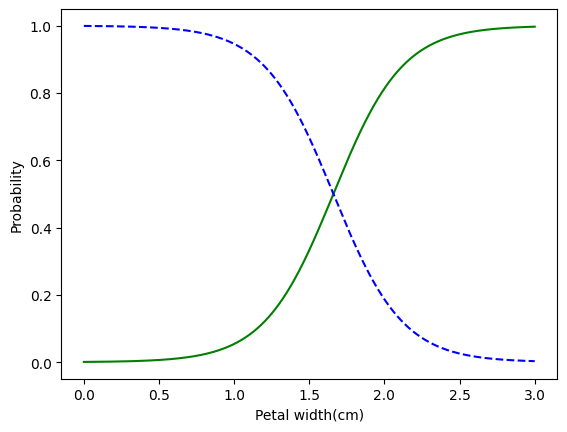

In [70]:
# using matplotlib for visuallisation
from importlib import reload
plt =reload(plt)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_prob = clf.predict_proba(X_new)
plt.plot(X_new, y_prob[:, 1], "g-", label="virginica")
plt.plot(X_new, y_prob[:, 0], "b--", label="Non virginica") 

plt.xlabel("Petal width(cm)")
plt.ylabel("Probability")
 